In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# load the data
df = pd.read_csv('data/mushrooms.csv')

In [75]:
# There are no null columns in the dataset
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [76]:
from sklearn.model_selection import train_test_split


# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
e    8124 non-null uint8
p    8124 non-null uint8
dtypes: uint8(2)
memory usage: 15.9 KB


In [77]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000


In [78]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.994
테스트 세트 정확도: 0.992


In [79]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Edible", "Poison"],
                feature_names=x.columns,
                impurity=False, filled=True)

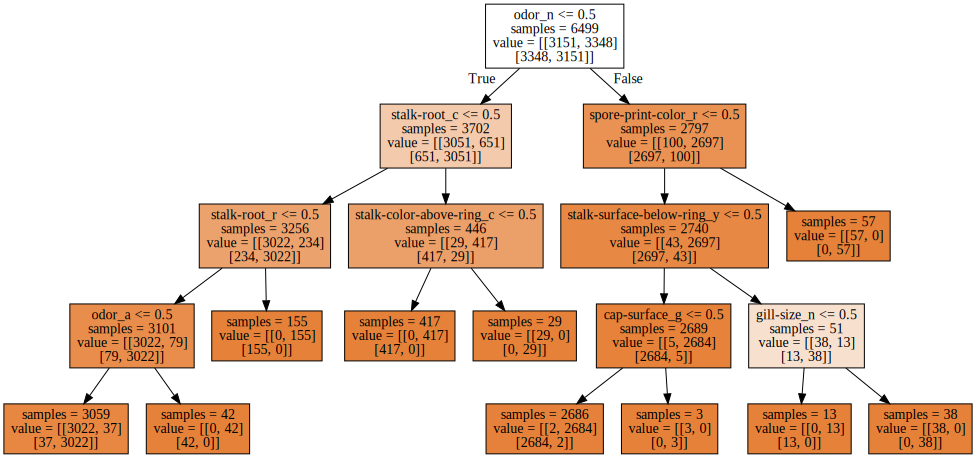

In [80]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [81]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.00188817 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02551574 0.
 0.         0.         0.         0.62491795 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00611235 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.18440244
 0.         0.0884679  0.         0.         0.         0.
 0.         0.         0.         0.0174469  0.         0.01711002
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

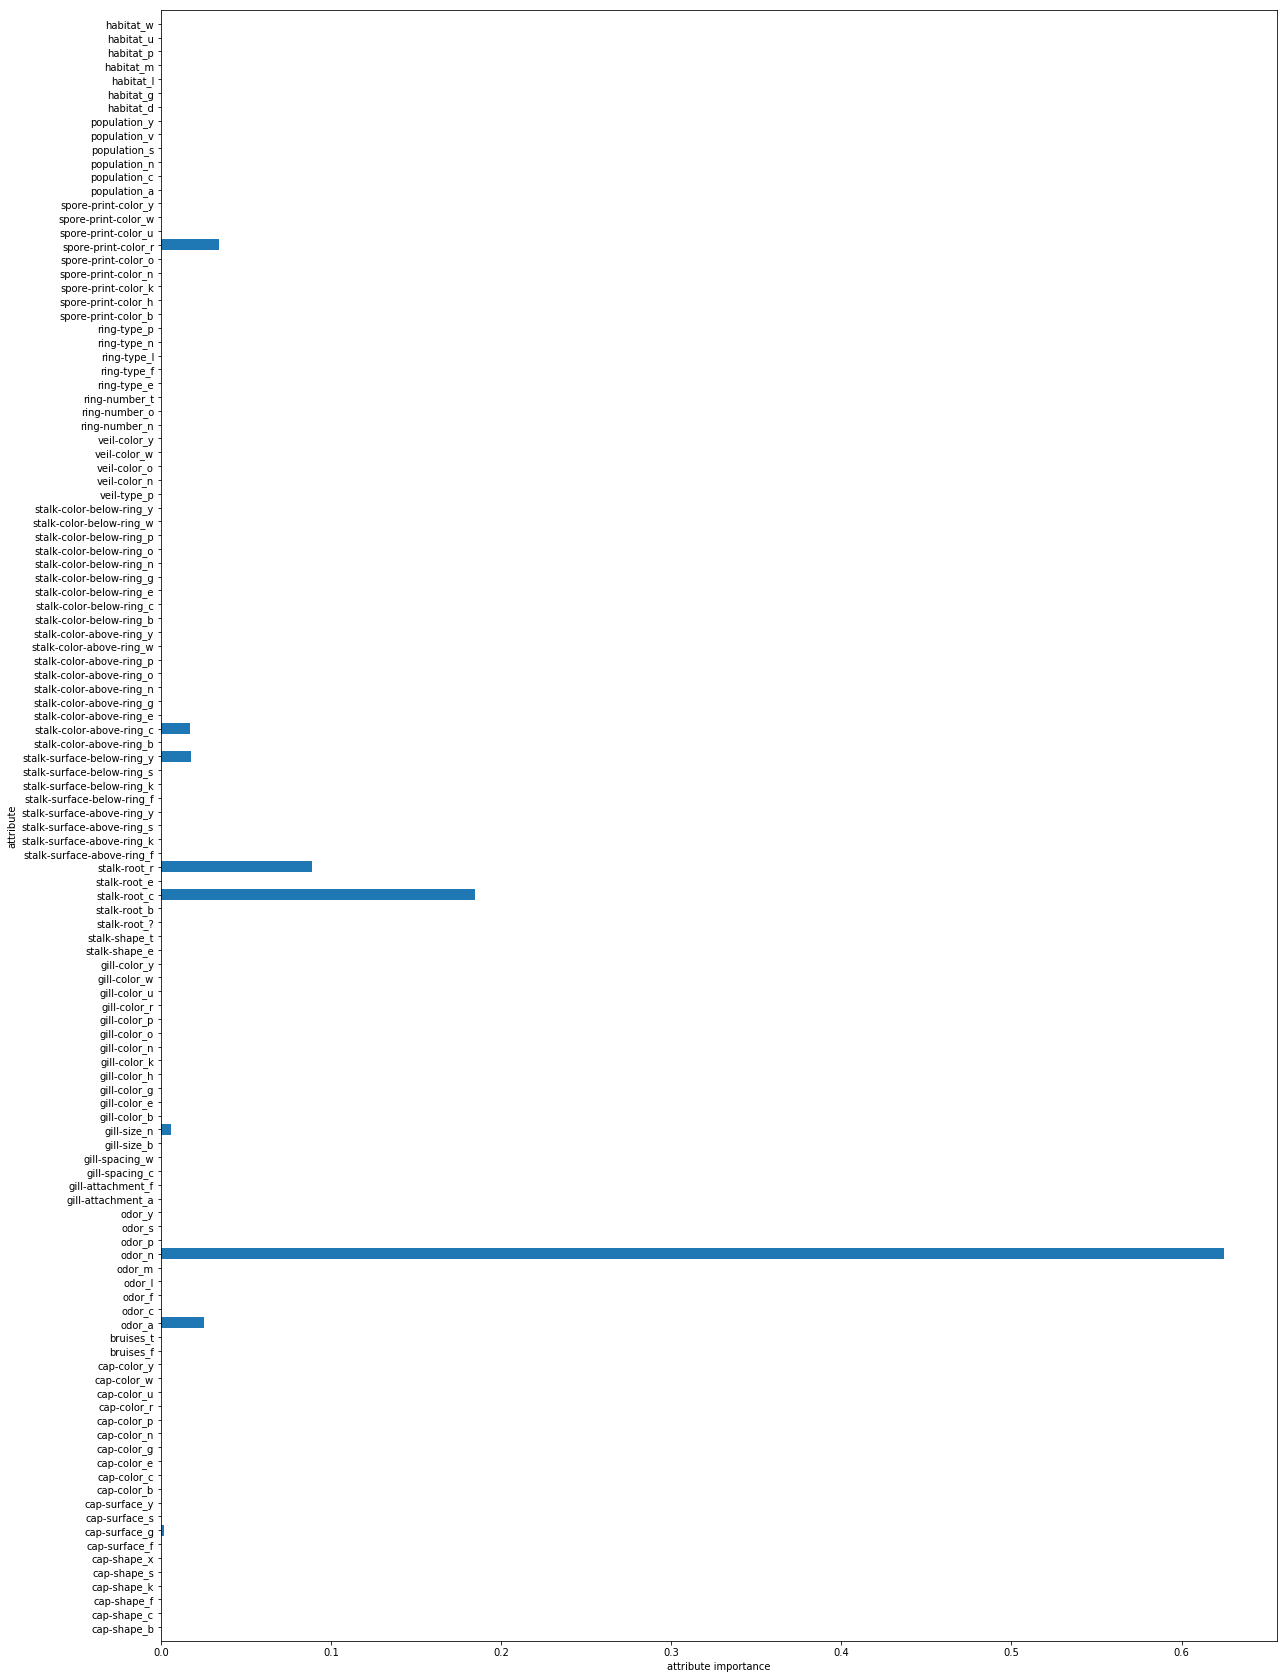

In [82]:
import matplotlib.pyplot as plt

def plot_feature_importances_x(model):
    n_features = x.shape[1]
    plt.figure(figsize=(20, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns)
    plt.xlabel("attribute importance")
    plt.ylabel("attribute")
    plt.ylim(-1, n_features)

plot_feature_importances_x(tree)

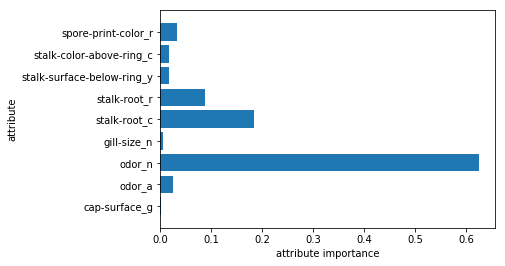

In [186]:
attr_importance = tree.feature_importances_[tree.feature_importances_ != 0]
attr_value = tree.feature_importances_ != 0
index = np.where(attr_value == True)[0]


def plot_feature_importances_x(model):
    n_features = len(attr_importance)
    plt.barh(range(n_features), model.feature_importances_[model.feature_importances_ != 0], align='center')
    plt.yticks(np.arange(n_features), X_test.columns[index])
    plt.xlabel("attribute importance")
    plt.ylabel("attribute")
    plt.ylim(-1, n_features)

plot_feature_importances_x(tree)